# Wine Variety Prediction Using Logistic Regression

Members:
- Mamaril, Ramil
- Cabarrubias, Jhon Roe
- Villegas, Lex

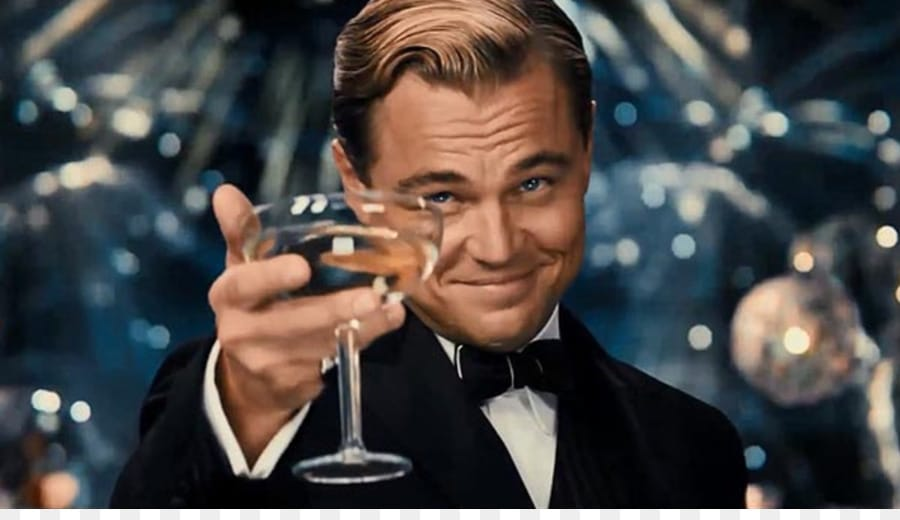

This is a data set of wine from kaggle. The purpose of this data set is to mimic the expertise of some sommelier (wine expert) on the taste of different wine, their origin or country, the qualities it contain based on the description.

source: https://www.kaggle.com/zynicide/wine-reviews

### Importation of Libraries needed

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Data Selection

In [2]:
file = open('C:/Users/Lex/Documents/GitHub/WineData/Data/winemag-data_first150k.csv' ,encoding = "ISO-8859-1")
wine_data = pd.read_csv(file)
wine_data

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",CuvÃ©e Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut RosÃ©,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [3]:
wine_data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [4]:
wine_data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Since the target prediction here is the Variety and Origin. We only extract the columns like country(origin), description (taste), points (wine grade), price of the wine, and its variety (Wine name). Other attributes other than the Variety and Origin is solely for descriptive purposes or more detailed view of the predicted value.

In [5]:
#Selected Data into Array
Extracted_data = wine_data[['country', 'description', 'points', 'price', 'variety']]
Extracted_data.sample(5)

,country,description,points,price,variety
31569,Germany,"Exuberantly floral, with notes of honeysuckle ...",91,25.0,Riesling
9731,Spain,This three-grape blend includes Sauvignon Blan...,85,15.0,White Blend
67231,US,"This blend of 55% Cabernet Sauvignon, 39% Merl...",87,25.0,Bordeaux-style Red Blend
116383,US,"Shows a raw, overripe raisiny edge to the blac...",83,75.0,Cabernet Sauvignon
66810,Italy,"Despite its heft, shows finesse in its black-c...",89,22.0,Sangiovese


In [6]:
Extracted_data.shape

(150930, 5)

### Data Pre-Processing

In [7]:
Extracted_data.isnull().sum()

country            5
description        0
points             0
price          13695
variety            0
dtype: int64

In [8]:
#Eliminate Rows with Null/Missing Values
Extracted_data.dropna(inplace = True)

<ipython-input-8-8ed1b177be18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Extracted_data.dropna(inplace = True)


In [9]:
print(Extracted_data.shape[0])

137230


In [10]:
Extracted_data.isnull().sum()

country        0
description    0
points         0
price          0
variety        0
dtype: int64

In [11]:
Extracted_data.variety.unique()

array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'RosÃ©',
       'Tempranillo Blend', 'Syrah', 'Mavrud', 'Sparkling Blend',
       'Sangiovese', 'RhÃ´ne-style White Blend', 'Red Blend',
       'MencÃ\xada', 'Palomino', 'Petite Sirah', 'Riesling',
       'Cabernet Sauvignon-Syrah', 'Portuguese Red', 'Pinot Gris',
       'Nebbiolo', 'Meritage', 'Baga', 'Glera', 'Malbec-Merlot',
       'Merlot-Malbec', 'Ugni Blanc-Colombard', 'Viognier',
       'Cabernet Sauvignon-Cabernet Franc', 'Moscato', 'Pinot Grigio',
       'Cabernet Franc', 'White Blend', 'Gamay', 'Zinfandel', 'Greco',
       'Barbera', 'Grenache', 'RhÃ´ne-style Red Blend', 'AlbariÃ±o',
       'Malvasia Bianca', 'Assyrtiko', 'Malagouzia', 'CarmenÃ¨re',
       'Bordeaux-style Red Blend', 'Touriga Nacional', 'Agiorgitiko',
       'Picpoul', 'Godello', 'GewÃ¼rztraminer', 'Merlot',
       'Syrah-Grenache', 'G-

In [12]:
Extracted_data.variety.nunique()

619

In [ ]:
Extracted_data.drop(Extracted_data[Extracted_data.variety.str.contains('Ã')
                                  |Extracted_data.variety.str.contains('Ä')
                                  |Extracted_data.variety.str.contains('Â') 
                                  |Extracted_data.variety.str.contains('Ç')].index, inplace = True)

In [13]:
Extracted_data.variety.nunique()

619

In [14]:
Extracted_data.shape

(137230, 5)

In [15]:
Extracted_data.to_csv('Extracted_data.csv', index = True)

In [16]:
Extracted_data.variety.value_counts().head(15)

Chardonnay                  13775
Pinot Noir                  13625
Cabernet Sauvignon          12671
Red Blend                    9377
Sauvignon Blanc              6054
Syrah                        5667
Riesling                     5212
Merlot                       4987
Bordeaux-style Red Blend     4545
Zinfandel                    3794
Malbec                       3085
Sangiovese                   2879
White Blend                  2554
Tempranillo                  2525
RosÃ©                        2461
Name: variety, dtype: int64

For faster training of data and model fitting. We only selected the top 15 wine variety.

In [17]:
top = ['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend', 'Sauvignon Blanc', 
       'Syrah', 'Riesling', 'Merlot', 'Bordeaux-style Red Blend', 'Zinfandel',
       'Malbec', 'Sangiovese', 'White Blend', 'Tempranillo', 'Shiraz']
final_data = Extracted_data.loc[Extracted_data['variety'].isin(top)]

In [18]:
final_data.shape

(92695, 5)

In [19]:
final_data

,country,description,points,price,variety
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Cabernet Sauvignon
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Pinot Noir
8,US,This re-named vineyard was formerly bottled as...,95,65.0,Pinot Noir
9,US,The producer sources from two blocks of the vi...,95,60.0,Pinot Noir
...,...,...,...,...,...
150911,France,"This needs a good bit of breathing time, then ...",87,37.0,Pinot Noir
150912,France,The nose is dominated by the attractive scents...,87,65.0,Pinot Noir
150915,US,"Decades ago, Beringerâs then-winemaker Myron...",93,30.0,White Blend
150925,Italy,Many people feel Fiano represents southern Ita...,91,20.0,White Blend


### Data Transformation

In order to make the description into something machine readable data. You need to perform text mining on the description of the wine. In that case, we use a python library called "SpaCy" for text mining.

In [20]:
#SpaCy for Text Mining
import os
import spacy as sc
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

#punctuation removal
punctuations = string.punctuation

#Stop words filtering
nlp = sc.load('en_core_web_sm')
stop_words = sc.lang.en.stop_words.STOP_WORDS
parser = English()

#Main Tokenizer Function
def spacy_tokenizer(sentence):
    # Token object
    mytokens = parser(sentence)

    # Lemmatization and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

C:\Users\Lex\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [21]:
# Custom transformer using spaCy
from sklearn.base import TransformerMixin

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
CV = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1), stop_words = 'english')

#Pipeline
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', CV)])
    
CV_Bag = CV.fit_transform(final_data['description'])

In [23]:
#Assign Numerical Values to the categories.
from sklearn.preprocessing import LabelEncoder
Labels = LabelEncoder()
#final_data['country'], uniques = pd.factorize(final_data['country'])
#final_data['variety'], uniques = pd.factorize(final_data['variety'])
final_data['country_num'] = Labels.fit_transform(final_data['country'])
final_data['variety_num'] = Labels.fit_transform(final_data['variety'])

<ipython-input-23-930fbfaa7301>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['country_num'] = Labels.fit_transform(final_data['country'])
<ipython-input-23-930fbfaa7301>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['variety_num'] = Labels.fit_transform(final_data['variety'])


In [24]:
final_data.to_csv("Final_Wine_Data.csv", index = True)

### Data Mining

In [25]:
#Assign the Variables
x = final_data.description #Independent Variable
y = final_data.variety #Dependent Variable
#np.asarray(Extracted_data[['country', 'variety']])
print(x.shape)
print(y.shape)

(92695,)
(92695,)


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.30)

In [27]:
CV.fit(x_train)

C:\Users\Lex\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(stop_words='english',
                tokenizer=<function spacy_tokenizer at 0x000002A1BF3C1550>)

In [28]:
x_train_dtm = CV.transform(x_train)
x_train_dtm = CV.fit_transform(x_train)
x_train_dtm

<64886x25257 sparse matrix of type '<class 'numpy.int64'>'
	with 1518072 stored elements in Compressed Sparse Row format>

In [29]:
x_test_dtm = CV.transform(x_test)
x_test_dtm 

<27809x25257 sparse matrix of type '<class 'numpy.int64'>'
	with 646123 stored elements in Compressed Sparse Row format>

In [30]:
#Text Classification
from sklearn.linear_model import LogisticRegression
start_desc = time.time()

lr = LogisticRegression(solver = 'saga', multi_class = 'multinomial', verbose = 2)
lr.fit(x_train_dtm, y_train)
y_pred_class = lr.predict(x_test_dtm)

end_desc = time.time()
desc_time = print(f"Training time is: {end_desc - start_desc}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 29 seconds
Training time is: 29.901947259902954


C:\Users\Lex\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.5s finished


In [33]:
#CNN-LSTM Classifier
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM, Bidirectional

input_shape = y.shape[0]

model = keras.Sequential()

#First Layer
model.add(keras.layers.Conv2D(16, (2, 2), activation = 'relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding = 'same'))
model.add(keras.layers.BatchNormalization())

#Second Layer
model.add(keras.layers.Conv2D(32, (2, 2), activation = 'relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding = 'same'))
model.add(keras.layers.BatchNormalization())

#First LSTM Layer
model.add(keras.layers.Bidirectional(LSTM(100)))
model.add(Dropout(0.2))

#Dense Layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))

#Output Layer
model.add(keras.layers.Dense(15, activation='softmax')) #15 Categories

#Model Compile
optimiser = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

TypeError: 'int' object is not iterable

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_class))

### Evaluation of the Model and Interpretation of Results

In [ ]:
#Classification Report of the Wine Varieties based on the mined text.
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, y_pred_class))

In [ ]:
#Confusion Matrix of the Wine Variety Classification
conf_mat = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (20,20))
sns.heatmap(conf_mat, annot = True, 
            linewidths = 0.2, cmap = 'Reds', cbar = True, 
            fmt = '.0f', square = True,
            xticklabels = top, yticklabels = top)
plt.title("Confusion Matrix", size = 24)
plt.xlabel("Predicted Values", size = 12)
plt.ylabel("Actual Values", size = 12)
plt.show()
#plt.savefig("WineVariety_ConfusionMatrix.png")

#fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

In [ ]:
#Actual and Predicted Values of the Wine Price based on Variety, Country, and Grade.
results = pd.DataFrame({'Actual Values':y1_test, 'Predicted Values':y1_pred_class})
results.head(10)

#### Testing the model using input.

In [ ]:
from numpy import array

try:
    
    wine_desc_input = input("Describe the wine flavor: ")
    string_input = ({wine_desc_input})
    string_conv = CV.transform(string_input)

    wine_variety = array(['Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Chardonnay', 'Malbec', 'Merlot', 
                          'Pinot Noir', 'Red Blend', 'Riesling', 'Sangiovese', 'Sauvignon Blanc',
                          'Shiraz', 'Syrah', 'Tempranillo', 'White Blend', 'Zinfandel'])

    result = lr.predict_proba(string_conv) #Logistic Regression
    result.max()
    Variety_Result = result.argmax()

    #price_pred = rfr.predict(Variety_Result)
    #wine_price = price_pred[0]

    print("\nWine Variety: " + wine_variety[Variety_Result])
    print(result.max())

except Exception as e:

    print("Please describe the flavor.", e)


    #print("\nWine Price: " + wine_price)